In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
months = list(reversed(['Dec', 'Nov','Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan']))

In [3]:
overnight_stays = pd.read_csv('../data/2017ides_0.csv')

In [4]:
overnight_stays.head()

,Date,Stays
0,Sep.18,1900.2
1,Aug.18,2171.5
2,Jul.18,2136.3
3,Jun.18,1915.4
4,May.18,1915.6


In [19]:
estimation_ides_0 = np.array([None] * 12)

for _, row in overnight_stays.iterrows():
    month = str(row.Date).split('.')[0]
    year = str(row.Date).split('.')[1]
    
    if year == str(17):
        estimation_ides_0[months.index(month)] = row.Stays
        
estimation_ides_0 = estimation_ides_0 / sum(estimation_ides_0)

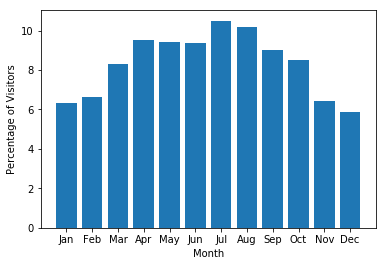

In [7]:
plt.bar(months, estimation_ides_0 * 100)
plt.xlabel('Month')
plt.ylabel('Percentage of Visitors')
plt.show()

In [8]:
ine2017 = pd.read_csv('../data/2017ine.csv')

In [9]:
ine2017

,index,total travelers,total nights
0,1,530169,1305045
1,2,554302,1369576
2,3,679290,1711908
3,4,747692,1962182
4,5,756711,1934841
5,6,752741,1924423
6,7,810147,2161747
7,8,728752,2099104
8,9,720629,1852445
9,10,690022,1747116


In [10]:
estimation_ine = ine2017['total nights'] / sum(ine2017['total nights'])

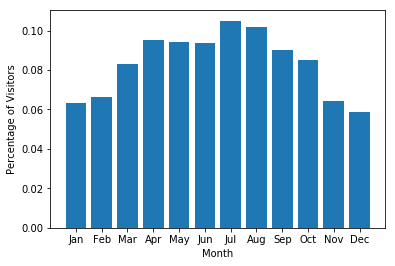

In [20]:
plt.bar(months, estimation_ine)
plt.xlabel('Month')
plt.ylabel('Percentage of Visitors')
plt.show()

In [12]:
ides2017 = pd.read_csv('../data/2017ides.csv')

In [13]:
ides2017

,Unnamed: 0,Month,Total travellers (thousands),Occupancy rate per room (%)
0,0,12/2017,977.1,46.1
1,1,11/2017,993.6,54.2
2,2,10/2017,1661.4,67.1
3,3,09/2017,2063.4,78.0
4,4,08/2017,2434.9,83.9
5,5,07/2017,2471.0,81.1
6,6,06/2017,2181.4,74.6
7,7,05/2017,1910.6,66.3
8,8,04/2017,1835.4,68.9
9,9,03/2017,1318.8,62.3


In [14]:
estimation_ides_1 = ides2017['Occupancy rate per room (%)'] / sum(ides2017['Occupancy rate per room (%)'])

In [15]:
estimation_ides_2 = ides2017['Total travellers (thousands)'] / sum(ides2017['Total travellers (thousands)'])

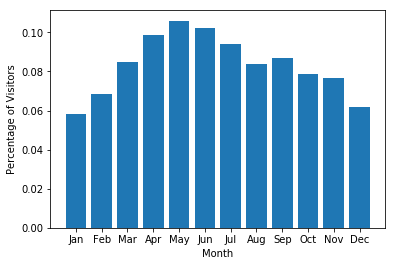

In [21]:
plt.bar(months, estimation_ides_1)
plt.xlabel('Month')
plt.ylabel('Percentage of Visitors')
plt.show()

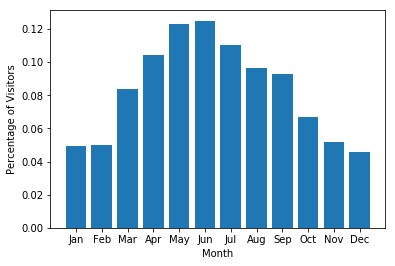

In [22]:
plt.bar(months, estimation_ides_2)
plt.xlabel('Month')
plt.ylabel('Percentage of Visitors')
plt.show()

In [30]:
estimation = (estimation_ides_1 + estimation_ine + estimation_ides_0) / 3

In [31]:
estimation

0     0.0616472
1     0.0671463
2     0.0836567
3     0.0963463
4     0.0979434
5      0.096428
6      0.101374
7      0.095854
8      0.088963
9     0.0827761
10    0.0682514
11    0.0596135
dtype: object

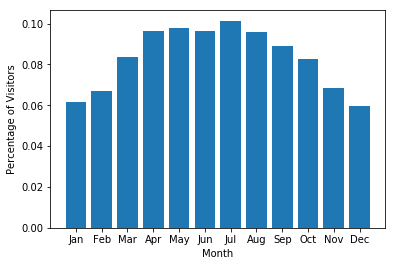

In [32]:
plt.bar(months, estimation)
plt.xlabel('Month')
plt.ylabel('Percentage of Visitors')
plt.show()

In [33]:
estimation.to_csv('../data/estimation_of_visitors.csv')